In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("data/job.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     4596 non-null   object
 1   company_name  4596 non-null   object
 2   location      4596 non-null   object
 3   start_date    4596 non-null   object
 4   ctc           4596 non-null   object
 5   experience    4596 non-null   object
 6   posted        4596 non-null   object
dtypes: object(7)
memory usage: 251.5+ KB


In [4]:
data["posted"].value_counts()

posted
3 weeks ago                                 1326
1 week ago                                  1031
2 weeks ago                                  936
3 days ago                                   198
2 days ago                                   138
4 days ago                                   109
6 days ago                                   100
5 days ago                                    98
1 week ago\n\n\nBe an early applicant         84
3 weeks ago\n\n\nBe an early applicant        81
2 weeks ago\n\n\nBe an early applicant        78
1 day ago                                     74
Few hours ago                                 60
2 days ago\n\n\nBe an early applicant         49
3 days ago\n\n\nBe an early applicant         46
1 day ago\n\n\nBe an early applicant          29
4 days ago\n\n\nBe an early applicant         26
Just now\n\n\nBe an early applicant           26
Few hours ago\n\n\nBe an early applicant      23
Today                                         19
Today\n\n\nBe

In [5]:
data["posted"] = data["posted"].str.replace("\n\n\nBe an early applicant", "")
data["min_ctc"] = data["ctc"].str.split("-").str[0].str.strip().str.replace("₹", "").str.replace(",", "")
data["max_ctc"] = data["ctc"].str.split("-").str[-1].str.strip().str.replace("₹", "").str.replace(",", "")
data[["min_ctc", "max_ctc"]] = data[["min_ctc", "max_ctc"]].apply(pd.to_numeric, errors='coerce')

In [6]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc
291,Associate Video Editor,Blue Rose Publishers,"Noida, Delhi",Starts Immediately,"₹ 2,64,000 - 3,50,000",1-2 years,2 days ago,264000.0,350000.0
4349,Senior Interior Designer,Disha Skill Training Services,Vashi,Starts Immediately,"₹ 4,20,000 - 4,80,000",4-6 years,3 weeks ago,420000.0,480000.0
1477,Customer Acquisition Manager,We Decor8,Gurgaon,Starts Immediately,"₹ 2,50,000 - 3,00,000",0-2 years,2 days ago,250000.0,300000.0
398,Corporate Sales Specialist,OckyPocky,Delhi,Starts Immediately,"₹ 3,00,000 - 3,50,000",0-3 years,1 week ago,300000.0,350000.0
4156,Associate Business Manager - New Categories,Meesho,Bangalore,Starts Immediately,Competitive salary,1-3 years,1 week ago,NaN,NaN


In [7]:
data["experience"] = data["experience"].str.replace(" years", "")
data["min_experience"] = data["experience"].str.split("-").str[0].str.strip()
data["max_experience"] = data["experience"].str.split("-").str[-1].str.strip()
data[["min_experience", "max_experience"]] = data[["min_experience", "max_experience"]].apply(pd.to_numeric, errors='coerce')

In [8]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
4054,Marketing Manager,Chemmanur International Holidays And Resorts,Mumbai,Starts Immediately,"₹ 5,00,000 - 8,00,000",4-6,1 week ago,500000.0,800000.0,4.0,6.0
1393,Content Specialist,Vibrant Publishers,Mumbai,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-2,Few hours ago,200000.0,400000.0,0.0,2.0
709,Front End Developer,Shubh International,Work from home,Starts Immediately,"₹ 8,00,000 - 10,00,000",0-2,1 week ago,800000.0,1000000.0,0.0,2.0
2944,Quality Analyst,Bonanza Portfolio Limited,Navi Mumbai,Starts Immediately,"₹ 4,50,000 - 5,00,000",0-5,2 weeks ago,450000.0,500000.0,0.0,5.0
3976,Junior Web Developer,Code Players,Noida,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-2,3 weeks ago,200000.0,400000.0,0.0,2.0


In [9]:
data["posted"].value_counts()

posted
3 weeks ago      1407
1 week ago       1115
2 weeks ago      1014
3 days ago        244
2 days ago        187
4 days ago        135
5 days ago        111
6 days ago        104
1 day ago         103
Few hours ago      83
Today              37
Just now           36
7 days ago         20
Name: count, dtype: int64

In [10]:
def convert_to_days(posted):
    if 'week' in posted:
        return int(posted.split()[0]) * 7
    elif 'days' in posted:
        return int(posted.split()[0])
    elif 'hour' in posted or 'Just now' in posted or 'Few hours ago' in posted or 'Today' in posted:
        return 0

data['posted'] = data['posted'].apply(convert_to_days)

In [11]:
data.sample(5)

,job_title,company_name,location,start_date,ctc,experience,posted,min_ctc,max_ctc,min_experience,max_experience
2302,International Taxation Associate,Parul Aggarwal,Delhi,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-2,7.0,200000.0,400000.0,0.0,2.0
1618,Business Development Associate,WinningLadder,Gurgaon,Starts Immediately,"₹ 4,50,000 - 6,00,000",0-5,4.0,450000.0,600000.0,0.0,5.0
3211,Graphic Designer,MentorBoxx,Pune,Starts Immediately,"₹ 4,00,000 - 8,00,000",0-5,21.0,400000.0,800000.0,0.0,5.0
2402,Animation & VFX Trainer,Red & White Multimedia Education,"Maninagar, Navsari, Surat",Starts Immediately,"₹ 2,40,000 - 4,80,000",0-2,7.0,240000.0,480000.0,0.0,2.0
3296,Corporate Sales Associate,United Global DMC,Greater Noida,Starts Immediately,"₹ 2,00,000 - 4,00,000",0-2,21.0,200000.0,400000.0,0.0,2.0


##  Exploratory Data Analysis (EDA) 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_49588/2083835533.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience', data=data, palette='viridis')


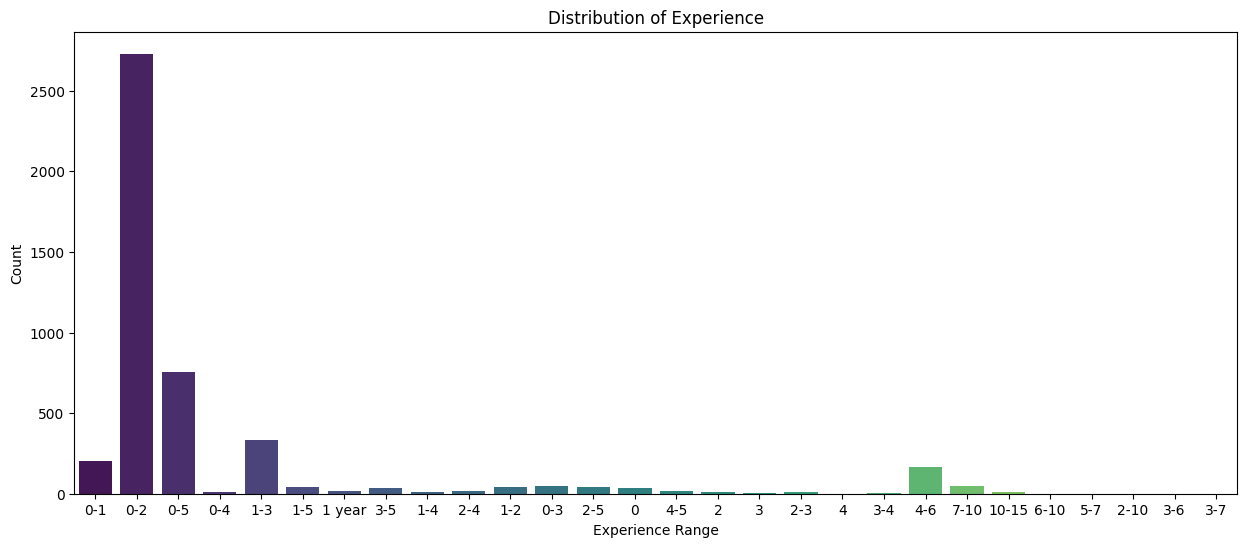

In [13]:
# Distribution of Experience
plt.figure(figsize=(15, 6))
sns.countplot(x='experience', data=data, palette='viridis')
plt.title('Distribution of Experience')
plt.xlabel('Experience Range')
plt.ylabel('Count')
plt.show()

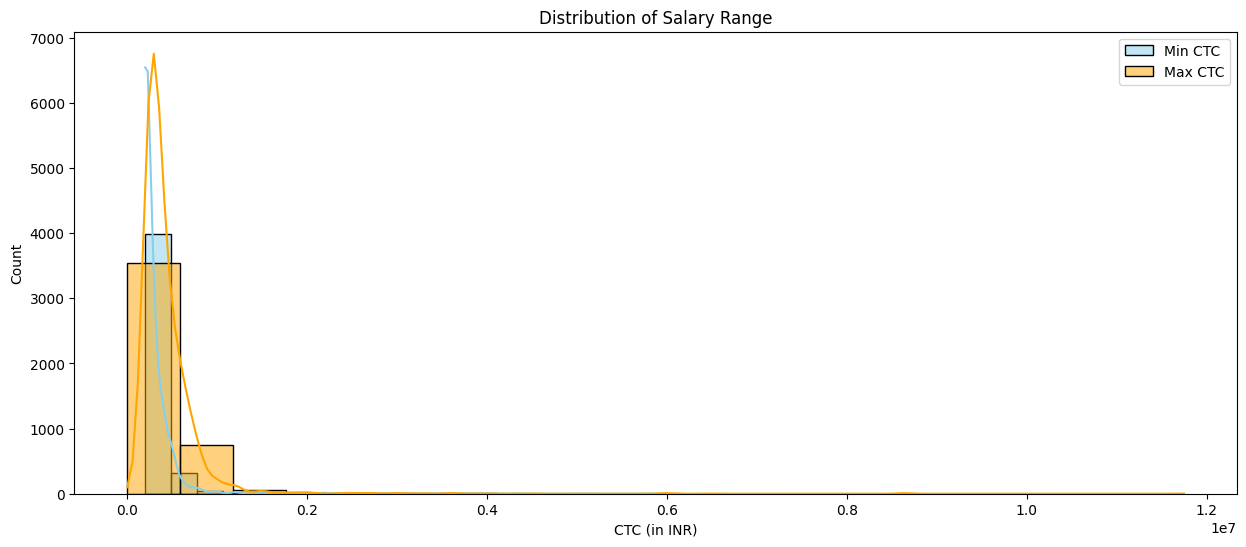

In [14]:
# Distribution of Salary Range
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='min_ctc', bins=20, kde=True, color='skyblue', label='Min CTC')
sns.histplot(data=data, x='max_ctc', bins=20, kde=True, color='orange', label='Max CTC')
plt.title('Distribution of Salary Range')
plt.xlabel('CTC (in INR)')
plt.ylabel('Count')
plt.legend()
plt.show()

/tmp/ipykernel_49588/1652722507.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=data, palette='muted', order=top_10_titles.index)


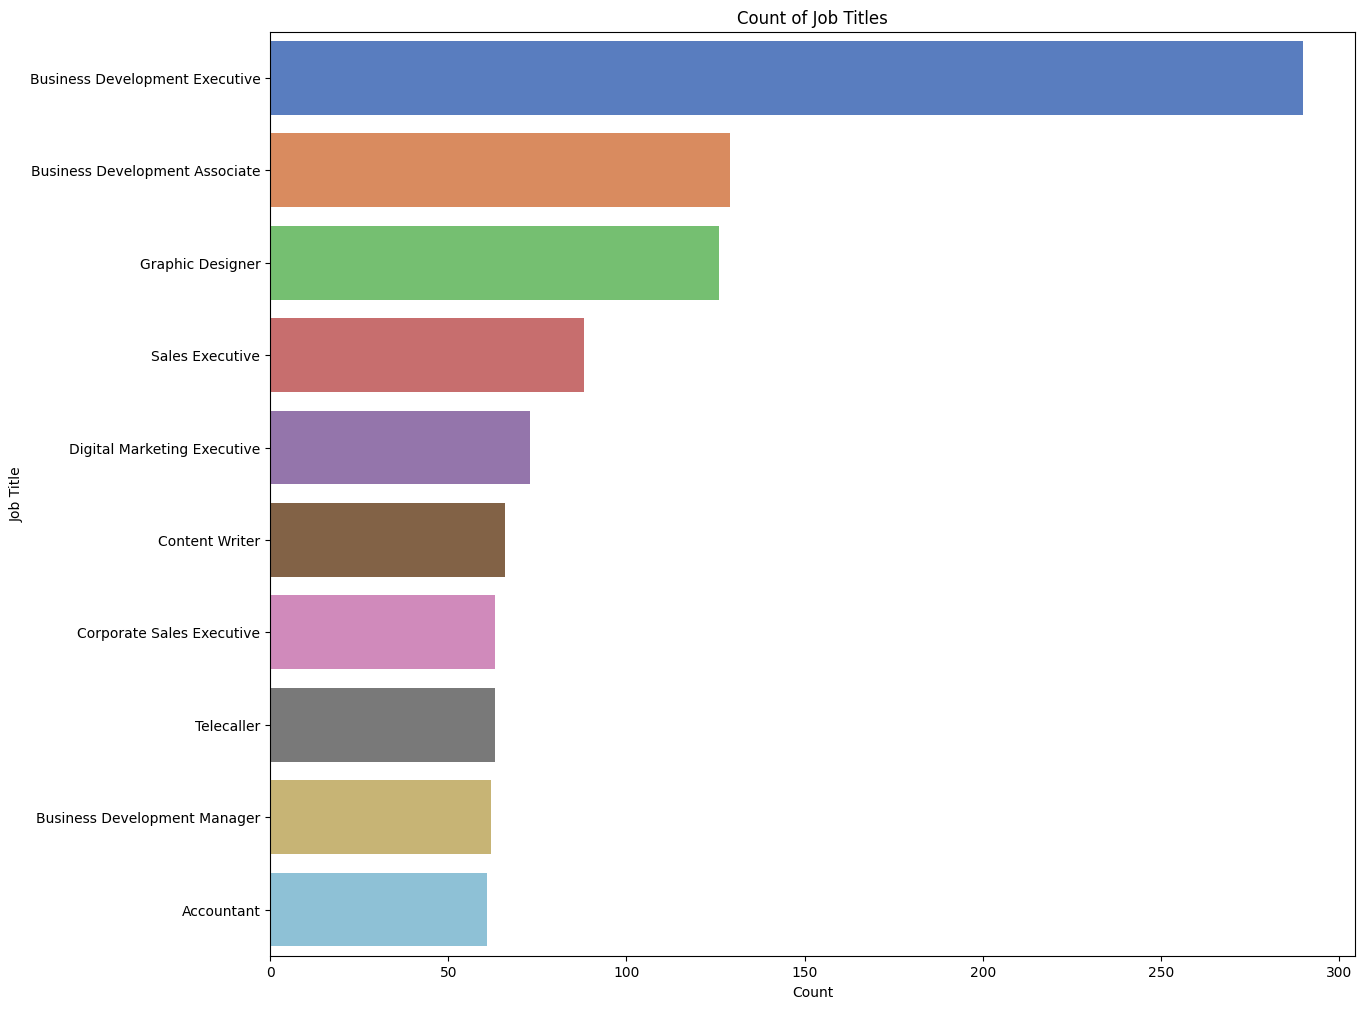

In [15]:
# Count of Job Titles

top_10_titles = data['job_title'].value_counts().head(10)
plt.figure(figsize=(14, 12))
sns.countplot(y='job_title', data=data, palette='muted', order=top_10_titles.index)
plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

/tmp/ipykernel_49588/3280689131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='min_ctc', y='job_title', data=data[:10], palette='Set2')


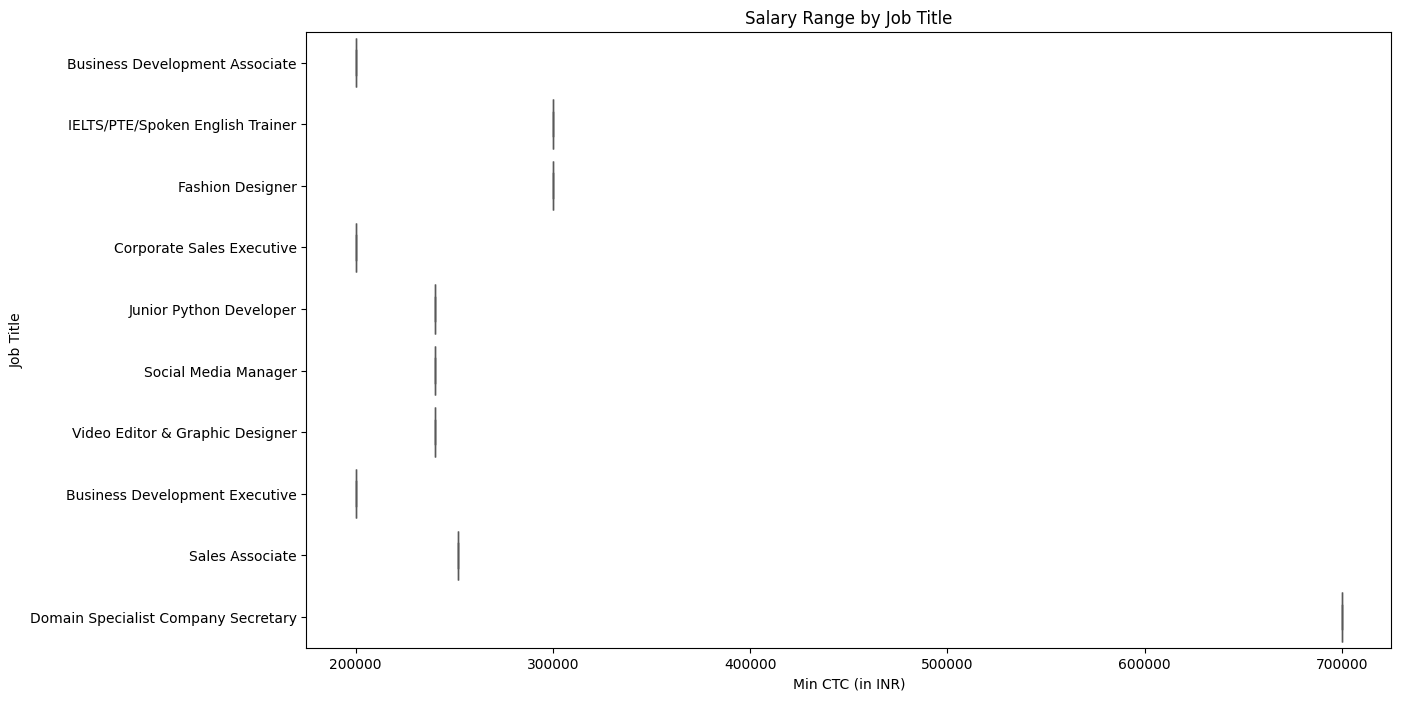

In [16]:
# Boxplot for Salary Range by Job Title
plt.figure(figsize=(14, 8))
sns.boxplot(x='min_ctc', y='job_title', data=data[:10], palette='Set2')
plt.title('Salary Range by Job Title')
plt.xlabel('Min CTC (in INR)')
plt.ylabel('Job Title')
plt.show()

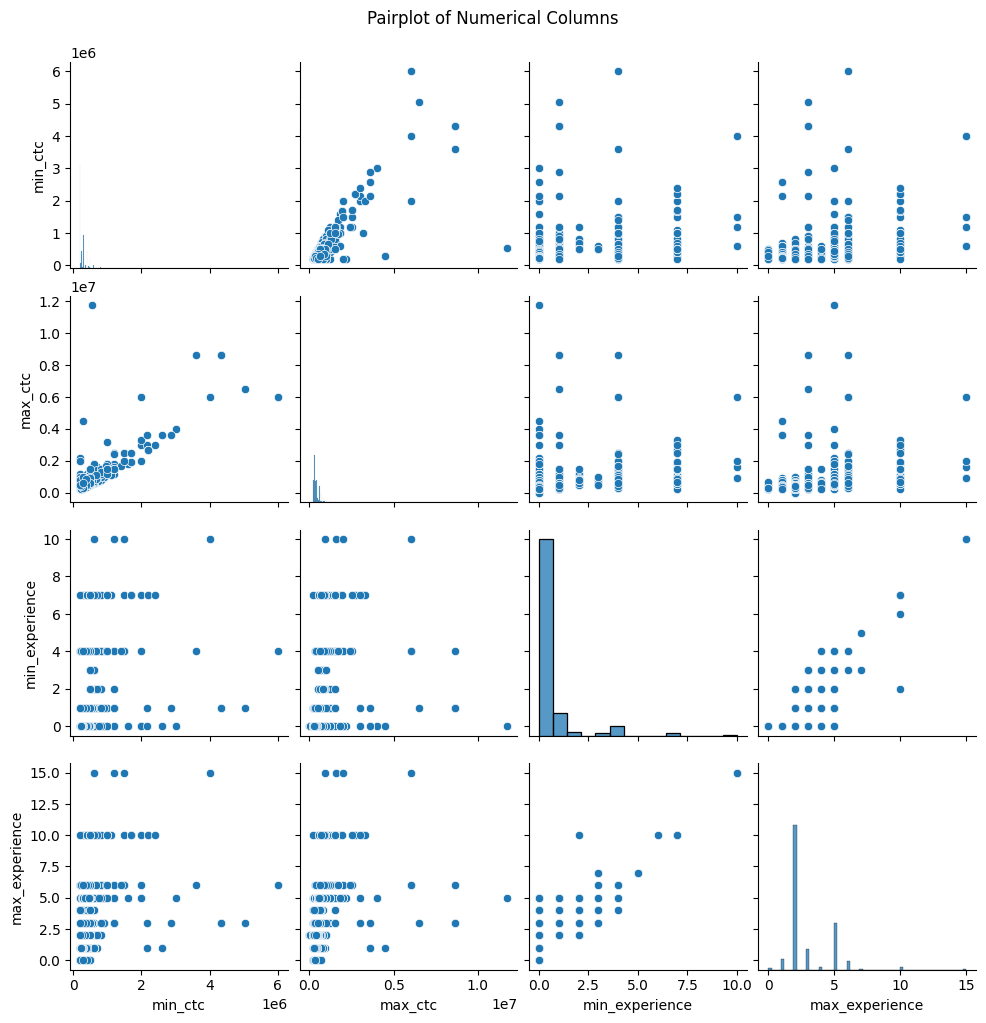

In [17]:
# Pairplot for numerical columns
sns.pairplot(data[['min_ctc', 'max_ctc', 'min_experience', 'max_experience']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

## Job and Salary Dataset Exploratory Data Analysis (EDA) Report

### Overview:
The dataset contains information about various job opportunities, including details about job titles, company names, locations, start dates, compensation (CTC), and experience requirements. This report provides insights derived from Exploratory Data Analysis (EDA) techniques.

### Job Titles Distribution:

- The dataset encompasses a diverse range of job titles.
- The top job titles include roles such as Business Development Associate, PHP Developer, Medical Officer, and WordPress Developer.

### Experience Levels Distribution:

- The distribution of experience levels indicates a mix of opportunities for candidates with varying experience.
- Job listings cover a broad range of experience levels, from entry-level positions (0-2 years) to roles requiring more extensive experience (0-5 years).

### Job Locations Distribution:

- The distribution of job locations illustrates the geographic spread of opportunities.
- Prominent locations include Bangalore, Mumbai, Delhi, and Work from Home positions.

### Salary Distribution:

- The histogram showcases the distribution of minimum (Min CTC) and maximum (Max CTC) compensation.
- The majority of jobs offer salaries within specific ranges, with some outliers having competitive or unspecified salary details.

### Key Findings:

- **Diverse Opportunities:** The dataset reflects a wide variety of job titles and industries.
- **Experience Requirement:** Opportunities cater to individuals across different experience levels, ensuring inclusivity.
- **Geographic Spread:** Jobs are available in various locations, including major cities and remote work options.
- **Salary Ranges:** The salary distribution highlights the varying compensation offered for different roles.

### Recommendations:

- Further analysis can be conducted on specific job titles or industries of interest.
- Deeper insights can be gained by exploring correlations between experience levels, locations, and salary ranges.
- Consideration of job posting frequency over time could provide insights into job market trends.

### Conclusion:
The EDA of the job and salary dataset offers a comprehensive understanding of the opportunities available. The insights gained can guide further analysis and decision-making for job seekers, recruiters, and researchers interested in the job market landscape.
